In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade ta

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
raw = "https://raw.githubusercontent.com/Tomukas10/Sentiment-analysis-and-machine-learning/refs/heads/main/Datasets%20and%20lexicon/Historical%20price%20dataset(raw).csv"

In [5]:
import pandas as pd
data = pd.read_csv(raw)

In [6]:
data.dropna(axis=1, how="all", inplace=True)
for col in ["Open", "High", "Low", "Close"]:
    data[col] = data[col].str.replace(",", "", regex=False)  # remove commas
    data[col] = pd.to_numeric(data[col], errors="coerce")    # convert to float

In [7]:
data.head()

,Date,Open,High,Low,Close
0,6/1/2020,3038.78,3062.18,3031.54,3055.73
1,6/2/2020,3064.78,3081.07,3051.64,3080.82
2,6/3/2020,3098.90,3130.94,3098.90,3122.87
3,6/4/2020,3111.56,3128.91,3090.41,3112.35
4,6/5/2020,3163.84,3211.72,3163.84,3193.93


//////////EMA calculation//////////////////

In [8]:
from ta.trend import EMAIndicator

data["EMA_14"] = EMAIndicator(close=data["Close"], window=14).ema_indicator()


In [9]:
ema_indicator = EMAIndicator(close=data["Close"], window=14)
data["EMA_14"] = ema_indicator.ema_indicator()

In [10]:
col = data.pop("EMA_14")   # remove column but keep values
data.insert(5, "EMA_14", col)

In [11]:
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'EMA_14'], dtype='object')


In [12]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(data)

         Date     Open     High      Low    Close       EMA_14
0    6/1/2020  3038.78  3062.18  3031.54  3055.73          NaN
1    6/2/2020  3064.78  3081.07  3051.64  3080.82          NaN
2    6/3/2020  3098.90  3130.94  3098.90  3122.87          NaN
3    6/4/2020  3111.56  3128.91  3090.41  3112.35          NaN
4    6/5/2020  3163.84  3211.72  3163.84  3193.93          NaN
5    6/8/2020  3199.92  3233.13  3196.00  3232.39          NaN
6    6/9/2020  3213.32  3222.71  3193.11  3207.18          NaN
7   6/10/2020  3213.42  3223.27  3181.49  3190.14          NaN
8   6/11/2020  3123.53  3123.53  2999.49  3002.10          NaN
9   6/12/2020  3071.04  3088.42  2984.47  3041.31          NaN
10  6/15/2020  2993.76  3079.76  2965.66  3066.59          NaN
11  6/16/2020  3131.00  3153.45  3076.06  3124.74          NaN
12  6/17/2020  3136.13  3141.16  3108.03  3113.49          NaN
13  6/18/2020  3101.64  3120.00  3093.51  3115.34  3105.475928
14  6/19/2020  3140.29  3155.53  3083.11  3097.74  3104

//////////RSI calculation/////////

In [13]:
from ta.momentum import RSIIndicator


In [14]:
data["RSI_14"] = RSIIndicator(close=data["Close"], window=14).rsi()


In [15]:
col = data.pop("RSI_14")
data.insert(6, "RSI_14", col)


In [16]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(data)

         Date     Open     High      Low    Close       EMA_14     RSI_14
0    6/1/2020  3038.78  3062.18  3031.54  3055.73          NaN        NaN
1    6/2/2020  3064.78  3081.07  3051.64  3080.82          NaN        NaN
2    6/3/2020  3098.90  3130.94  3098.90  3122.87          NaN        NaN
3    6/4/2020  3111.56  3128.91  3090.41  3112.35          NaN        NaN
4    6/5/2020  3163.84  3211.72  3163.84  3193.93          NaN        NaN
5    6/8/2020  3199.92  3233.13  3196.00  3232.39          NaN        NaN
6    6/9/2020  3213.32  3222.71  3193.11  3207.18          NaN        NaN
7   6/10/2020  3213.42  3223.27  3181.49  3190.14          NaN        NaN
8   6/11/2020  3123.53  3123.53  2999.49  3002.10          NaN        NaN
9   6/12/2020  3071.04  3088.42  2984.47  3041.31          NaN        NaN
10  6/15/2020  2993.76  3079.76  2965.66  3066.59          NaN        NaN
11  6/16/2020  3131.00  3153.45  3076.06  3124.74          NaN        NaN
12  6/17/2020  3136.13  3141.16  3108.

////////MACD calculation///////


In [17]:
from ta.trend import MACD


In [18]:
macd_indicator = MACD(close=data["Close"], window_slow=26, window_fast=12, window_sign=9)

data["MACD"] = macd_indicator.macd()              # MACD line
data["MACD_Signal"] = macd_indicator.macd_signal()
data["MACD_Hist"] = macd_indicator.macd_diff()


In [19]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(data)

         Date     Open     High      Low    Close       EMA_14     RSI_14  \
0    6/1/2020  3038.78  3062.18  3031.54  3055.73          NaN        NaN   
1    6/2/2020  3064.78  3081.07  3051.64  3080.82          NaN        NaN   
2    6/3/2020  3098.90  3130.94  3098.90  3122.87          NaN        NaN   
3    6/4/2020  3111.56  3128.91  3090.41  3112.35          NaN        NaN   
4    6/5/2020  3163.84  3211.72  3163.84  3193.93          NaN        NaN   
5    6/8/2020  3199.92  3233.13  3196.00  3232.39          NaN        NaN   
6    6/9/2020  3213.32  3222.71  3193.11  3207.18          NaN        NaN   
7   6/10/2020  3213.42  3223.27  3181.49  3190.14          NaN        NaN   
8   6/11/2020  3123.53  3123.53  2999.49  3002.10          NaN        NaN   
9   6/12/2020  3071.04  3088.42  2984.47  3041.31          NaN        NaN   
10  6/15/2020  2993.76  3079.76  2965.66  3066.59          NaN        NaN   
11  6/16/2020  3131.00  3153.45  3076.06  3124.74          NaN        NaN   

////// ATR calculation /////

In [20]:
from ta.volatility import AverageTrueRange


In [21]:
atr = AverageTrueRange(high=data["High"], low=data["Low"], close=data["Close"], window=14)
data["ATR_14"] = atr.average_true_range()


In [22]:
col = data.pop("ATR_14")
data.insert(10,"ATR_14", col)


In [23]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(data)

         Date     Open     High      Low    Close       EMA_14     RSI_14  \
0    6/1/2020  3038.78  3062.18  3031.54  3055.73          NaN        NaN   
1    6/2/2020  3064.78  3081.07  3051.64  3080.82          NaN        NaN   
2    6/3/2020  3098.90  3130.94  3098.90  3122.87          NaN        NaN   
3    6/4/2020  3111.56  3128.91  3090.41  3112.35          NaN        NaN   
4    6/5/2020  3163.84  3211.72  3163.84  3193.93          NaN        NaN   
5    6/8/2020  3199.92  3233.13  3196.00  3232.39          NaN        NaN   
6    6/9/2020  3213.32  3222.71  3193.11  3207.18          NaN        NaN   
7   6/10/2020  3213.42  3223.27  3181.49  3190.14          NaN        NaN   
8   6/11/2020  3123.53  3123.53  2999.49  3002.10          NaN        NaN   
9   6/12/2020  3071.04  3088.42  2984.47  3041.31          NaN        NaN   
10  6/15/2020  2993.76  3079.76  2965.66  3066.59          NaN        NaN   
11  6/16/2020  3131.00  3153.45  3076.06  3124.74          NaN        NaN   

In [24]:
#split the train and test data and replace any NaN's to avoid reducing any NaN train set rows.(it can hurt accuracy).
data = data.fillna(0.0)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size].copy()
test_data = data.iloc[train_size:].copy()

In [25]:
# Create target: 1 if next day's Close is higher, 0 if lower
train_data["Target"] = (train_data["Close"].shift(-1) > train_data["Close"]).astype(int)

# Drop last row in training (since it has no next-day close)
train_data = train_data[:-1]

# Features
feature_cols = ["EMA_14", "RSI_14", "MACD", "MACD_Signal", "MACD_Hist", "ATR_14"]
X_train = train_data[feature_cols]
y_train = train_data["Target"]


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [27]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(data)

         Date     Open     High      Low    Close       EMA_14     RSI_14  \
0    6/1/2020  3038.78  3062.18  3031.54  3055.73     0.000000   0.000000   
1    6/2/2020  3064.78  3081.07  3051.64  3080.82     0.000000   0.000000   
2    6/3/2020  3098.90  3130.94  3098.90  3122.87     0.000000   0.000000   
3    6/4/2020  3111.56  3128.91  3090.41  3112.35     0.000000   0.000000   
4    6/5/2020  3163.84  3211.72  3163.84  3193.93     0.000000   0.000000   
5    6/8/2020  3199.92  3233.13  3196.00  3232.39     0.000000   0.000000   
6    6/9/2020  3213.32  3222.71  3193.11  3207.18     0.000000   0.000000   
7   6/10/2020  3213.42  3223.27  3181.49  3190.14     0.000000   0.000000   
8   6/11/2020  3123.53  3123.53  2999.49  3002.10     0.000000   0.000000   
9   6/12/2020  3071.04  3088.42  2984.47  3041.31     0.000000   0.000000   
10  6/15/2020  2993.76  3079.76  2965.66  3066.59     0.000000   0.000000   
11  6/16/2020  3131.00  3153.45  3076.06  3124.74     0.000000   0.000000   

In [28]:
# Create target for test data similarly
test_data["Target"] = (test_data["Close"].shift(-1) > test_data["Close"]).astype(int)
test_data = test_data[:-1]  # drop last row

X_test = test_data[feature_cols]
y_test = test_data["Target"]

# Predict
preds = model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, preds))


Test Accuracy: 0.5


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.56      0.56      0.56         9

    accuracy                           0.50        16
   macro avg       0.49      0.49      0.49        16
weighted avg       0.50      0.50      0.50        16

Confusion Matrix:
 [[3 4]
 [4 5]]


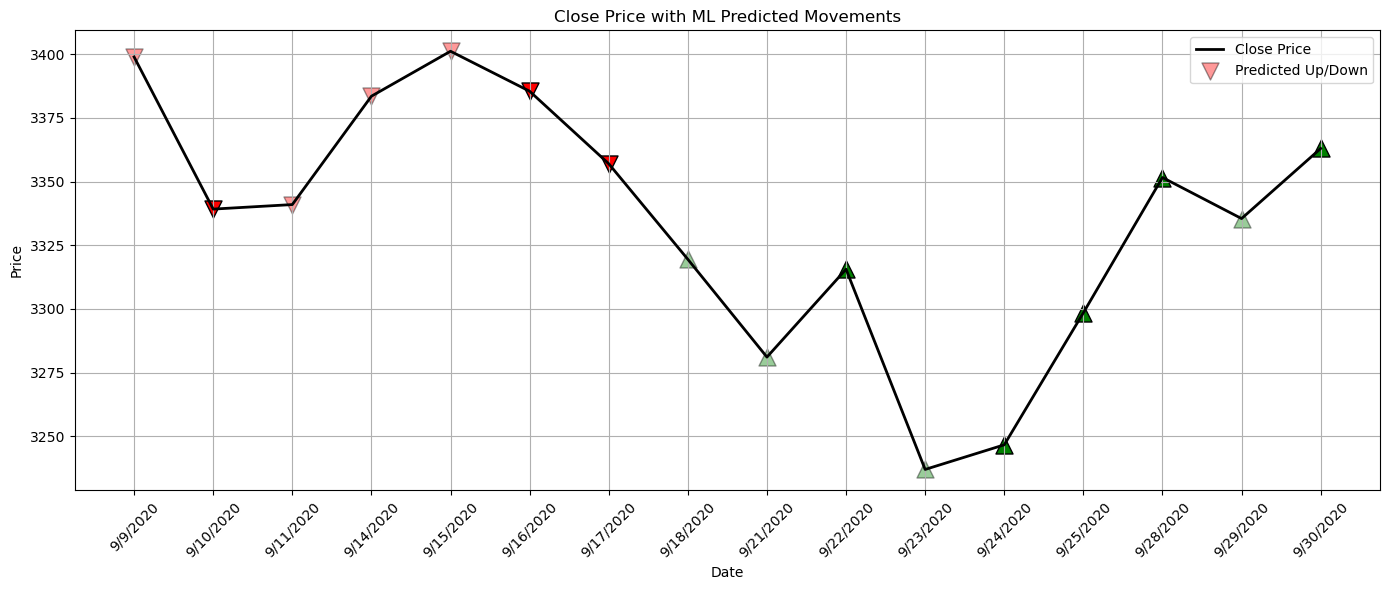

In [30]:
import matplotlib.pyplot as plt

#test data selection
close_test = data["Close"].iloc[-len(y_test):].values
dates_test = data["Date"].iloc[-len(y_test):].values
y_test_values = y_test.values

#plottign of all the predictions over the actual close price
plt.figure(figsize=(14,6))
plt.plot(dates_test, close_test, label="Close Price", color="black", linewidth=2)

for i, pred in enumerate(preds):
    color = "green" if pred == 1 else "red"
    marker = '^' if pred == 1 else 'v'
    alpha = 1.0 if pred == y_test_values[i] else 0.4
    plt.scatter(dates_test[i], close_test[i], color=color, s=150, marker=marker, alpha=alpha, edgecolors='k')

plt.title("Close Price with ML Predicted Movements")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)  # rotate dates for readability
plt.legend(["Close Price", "Predicted Up/Down"])
plt.grid(True)
plt.tight_layout()
plt.show()
